In [55]:
#import lib
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#define variables
SYMBOL = 'EURUSD=X'
START_DATE = '2020-01-01'
END_DATE = '2024-12-31'
INTERVAL = '1d'

STARTING_BALANCE = 10000
MA_PERIOD = 100

#download data
data = yf.download(SYMBOL, start=START_DATE, end=END_DATE, interval=INTERVAL, multi_level_index=False)

data.tail()

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,1.040583,1.041124,1.038745,1.040583,0
2024-12-25,1.040258,1.043297,1.040150,1.040258,0
2024-12-26,1.039955,1.042535,1.039145,1.039955,0
2024-12-27,1.042318,1.044495,1.040669,1.042318,0
2024-12-30,1.042938,1.045850,1.037420,1.042938,0


In [57]:
#calculate daily return for close/close and close/open
data['Return'] = data.Close / data.Close.shift(1)

#calculate buy and hold balance
data['Bench_Bal'] = data.Return.cumprod() * STARTING_BALANCE

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal
Date,,,,,,,
2024-12-24,1.040583,1.041124,1.038745,1.040583,0,0.997388,9273.672590
2024-12-25,1.040258,1.043297,1.040150,1.040258,0,0.999688,9270.778631
2024-12-26,1.039955,1.042535,1.039145,1.039955,0,0.999709,9268.080152
2024-12-27,1.042318,1.044495,1.040669,1.042318,0,1.002272,9289.138910
2024-12-30,1.042938,1.045850,1.037420,1.042938,0,1.000594,9294.661230


In [58]:
#calculate moving average
data['SMA'] = data.Close.rolling(window = MA_PERIOD).mean()

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA
Date,,,,,,,,
2024-12-24,1.040583,1.041124,1.038745,1.040583,0,0.997388,9273.672590,1.084726
2024-12-25,1.040258,1.043297,1.040150,1.040258,0,0.999688,9270.778631,1.084202
2024-12-26,1.039955,1.042535,1.039145,1.039955,0,0.999709,9268.080152,1.083674
2024-12-27,1.042318,1.044495,1.040669,1.042318,0,1.002272,9289.138910,1.083181
2024-12-30,1.042938,1.045850,1.037420,1.042938,0,1.000594,9294.661230,1.082697


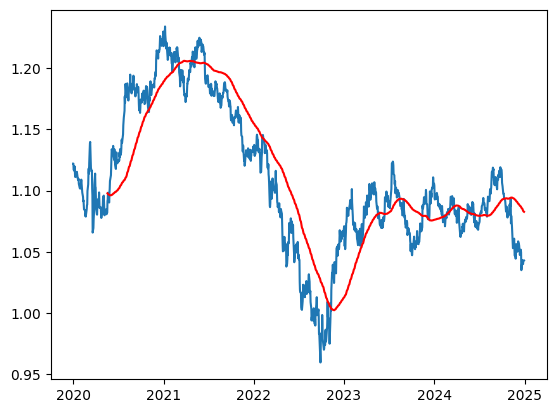

In [59]:
#plot chart with moving average overlaid
plt.plot(data.Close)
plt.plot(data.SMA, color="red")
plt.show()

In [60]:
#Hold a position for every day the close is above the 200 MA
data['Long'] = data.Close > data.SMA

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA,Long
Date,,,,,,,,,
2024-12-24,1.040583,1.041124,1.038745,1.040583,0,0.997388,9273.672590,1.084726,False
2024-12-25,1.040258,1.043297,1.040150,1.040258,0,0.999688,9270.778631,1.084202,False
2024-12-26,1.039955,1.042535,1.039145,1.039955,0,0.999709,9268.080152,1.083674,False
2024-12-27,1.042318,1.044495,1.040669,1.042318,0,1.002272,9289.138910,1.083181,False
2024-12-30,1.042938,1.045850,1.037420,1.042938,0,1.000594,9294.661230,1.082697,False


In [61]:
#calculate the daily return from Open to Open on days in the market
#on days when there is no trade, return is 1
data['Sys_Return'] = np.where(data.Long.shift(1) == True, data.Return, 1)

#calculate system balance
data['Sys_Bal'] = STARTING_BALANCE * data.Sys_Return.cumprod()

data.tail()

,Close,High,Low,Open,Volume,Return,Bench_Bal,SMA,Long,Sys_Return,Sys_Bal
Date,,,,,,,,,,,
2024-12-24,1.040583,1.041124,1.038745,1.040583,0,0.997388,9273.672590,1.084726,False,1.0,10541.263906
2024-12-25,1.040258,1.043297,1.040150,1.040258,0,0.999688,9270.778631,1.084202,False,1.0,10541.263906
2024-12-26,1.039955,1.042535,1.039145,1.039955,0,0.999709,9268.080152,1.083674,False,1.0,10541.263906
2024-12-27,1.042318,1.044495,1.040669,1.042318,0,1.002272,9289.138910,1.083181,False,1.0,10541.263906
2024-12-30,1.042938,1.045850,1.037420,1.042938,0,1.000594,9294.661230,1.082697,False,1.0,10541.263906


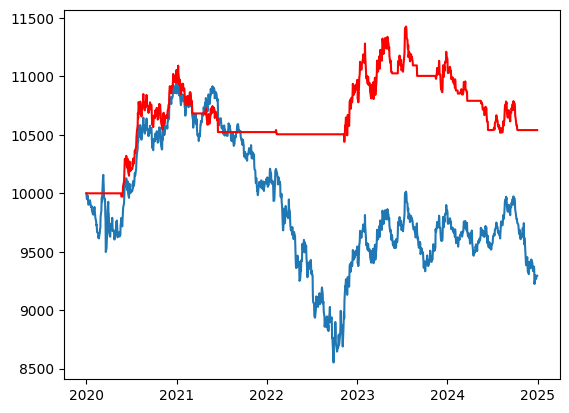

In [62]:
plt.plot(data.Bench_Bal)
plt.plot(data.Sys_Bal, color="red")

plt.show()

In [63]:
# # --- Trade statistics ---
# # A trade is considered 'entered' when the signal goes from False → True
# data['Trade_Entry'] = (data['Long'].shift(1) == False) & (data['Long'] == True)

# # Mark entry and exit prices
# entries = data.loc[data['Trade_Entry']].copy()
# entries['Entry_Price'] = entries['Open']

# # Mark exits (when the Long signal turns False)
# data['Trade_Exit'] = (data['Long'].shift(1) == True) & (data['Long'] == False)
# exits = data.loc[data['Trade_Exit']].copy()
# exits['Exit_Price'] = exits['Open']

# # Align indexes (assume exit always follows entry in order)
# min_len = min(len(entries), len(exits))
# entries = entries.iloc[:min_len]
# exits = exits.iloc[:min_len]

# # Calculate PnL per trade
# pnl = exits['Exit_Price'].values - entries['Entry_Price'].values
# winning_trades = (pnl > 0).sum()
# total_trades = len(pnl)
# win_rate = winning_trades / total_trades if total_trades > 0 else 0

# print(f"📊 Total Trades: {total_trades}")
# print(f"✅ Winning Trades: {winning_trades}")
# print(f"🏆 Win Rate: {win_rate:.2%}")

# 标记交易开仓点（Long 从 False 变 True）
data['Trade_Entry'] = (data['Long'].shift(1) == False) & (data['Long'] == True)

# 标记交易平仓点（Long 从 True 变 False）
data['Trade_Exit'] = (data['Long'].shift(1) == True) & (data['Long'] == False)

# 取出开仓和平仓的数据
entries = data.loc[data['Trade_Entry']].copy()
exits = data.loc[data['Trade_Exit']].copy()

# 对齐 entry / exit（确保一一对应）
min_len = min(len(entries), len(exits))
entries = entries.iloc[:min_len]
exits = exits.iloc[:min_len]

# 创建交易明细 DataFrame
trades = pd.DataFrame({
    'Entry_Date': entries.index,
    'Entry_Price': entries['Open'].values,
    'Exit_Date': exits.index,
    'Exit_Price': exits['Open'].values,
})

# 计算每笔盈亏
trades['PnL'] = trades['Exit_Price'] - trades['Entry_Price']
trades['Result'] = np.where(trades['PnL'] > 0, 'Win', 'Loss')

# 计算汇总
total_trades = len(trades)
winning_trades = (trades['Result'] == 'Win').sum()
win_rate = winning_trades / total_trades if total_trades > 0 else 0

print(f"\n📊 Total Trades: {total_trades}")
print(f"✅ Winning Trades: {winning_trades}")
print(f"🏆 Win Rate: {win_rate:.2%}")

# 输出每笔交易明细
pd.set_option('display.max_rows', None)  # 显示全部交易
print("\n📋 Trade Details:")
print(trades[['Entry_Date', 'Entry_Price', 'Exit_Date', 'Exit_Price', 'PnL', 'Result']])



📊 Total Trades: 26
✅ Winning Trades: 6
🏆 Win Rate: 23.08%

📋 Trade Details:
   Entry_Date  Entry_Price  Exit_Date  Exit_Price       PnL Result
0  2020-05-21     1.097936 2020-05-22    1.095242 -0.002694   Loss
1  2020-05-27     1.098056 2020-11-02    1.164253  0.066196    Win
2  2020-11-04     1.176457 2021-02-05    1.196745  0.020288    Win
3  2021-02-08     1.204935 2021-03-05    1.196859 -0.008076   Loss
4  2021-04-26     1.208956 2021-05-03    1.202646 -0.006310   Loss
5  2021-05-04     1.205982 2021-05-05    1.201634 -0.004347   Loss
6  2021-05-07     1.206593 2021-06-17    1.199185 -0.007408   Loss
7  2022-02-04     1.143511 2022-02-09    1.142113 -0.001397   Loss
8  2022-02-10     1.142126 2022-02-11    1.141175 -0.000952   Loss
9  2022-11-09     1.008085 2022-11-10    1.001954 -0.006131   Loss
10 2022-11-11     1.019222 2023-05-19    1.077540  0.058317    Win
11 2023-05-22     1.082275 2023-05-23    1.081105 -0.001170   Loss
12 2023-06-15     1.084305 2023-08-15    1.090988  0